## **Install conda and rdkit**

INTENTION OF THIS NOTEBOOK: Compute molecular descriptors and then perform exploratory data analysis on these descriptors.

RDKit allows the computation of the molecular descriptors for the compounds in the compiled dataset (pdl1_bioactivity_preprocessed_data.csv).

This dataset shows the biological activity data from the ChEMBL database for the specific PD-L1 protein, and is comprised of the molecular names and the corresponding SMILES notation (information about the chemical structure). This information will be used in this notebook to compute the molecular descriptors. 

The dataset also includes the IC50 (the half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function), which has been binned into 3 categories: active (<= 1000), inactive (>= 10,000), and intermediate (all values in between). For this analysis, we will only be comparing the inactive and the active compounds. 

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-22 23:47:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   139MB/s    in 0.6s    

2021-08-22 23:47:09 (139 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('pdl1_bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

Basically: Can these compounds be absorbed into the body, distributed to the tissue/organs, become metabolized, and then eventually excreted out of the body. 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,467.562,3.06352,4.0,7.0
1,486.568,5.26058,1.0,6.0
2,400.522,4.60922,2.0,3.0
3,409.913,5.45712,2.0,3.0
4,472.629,4.86994,2.0,4.0
5,475.585,5.69732,1.0,5.0
6,448.563,4.48392,2.0,5.0
7,494.429,6.44262,1.0,3.0
8,419.525,3.87032,2.0,5.0
9,449.591,5.36472,2.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL3582257,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNC(CO)(...,active,6.00
1,CHEMBL3582256,COc1cc(OCc2cccc(-c3ccccc3)c2C#N)cc(OC)c1CN1CCC...,active,6.00
2,CHEMBL3582255,Cc1c(COc2ccc(CNCC3CCC(=O)N3)cc2)cccc1-c1ccccc1,intermediate,1010.00
3,CHEMBL3582254,Cc1c(COc2ccc(CN[C@H](C)C(=O)O)cc2Cl)cccc1-c1cc...,active,6.00
4,CHEMBL3582253,Cc1cc(CN2CCC(C(=O)NCCO)CC2)ccc1OCc1cccc(-c2ccc...,active,110.00
5,CHEMBL3582252,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[...,active,6.00
6,CHEMBL4081869,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNCCNC(C)=O,active,6.00
7,CHEMBL4099869,Cc1c(COc2ccc(CN3CCCCC3C(=O)O)cc2Br)cccc1-c1ccccc1,active,146.00
8,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,18.00
9,CHEMBL4061613,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN[C@@H]...,active,6.00


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3582257,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNC(CO)(...,active,6.00,467.562,3.06352,4.0,7.0
1,CHEMBL3582256,COc1cc(OCc2cccc(-c3ccccc3)c2C#N)cc(OC)c1CN1CCC...,active,6.00,486.568,5.26058,1.0,6.0
2,CHEMBL3582255,Cc1c(COc2ccc(CNCC3CCC(=O)N3)cc2)cccc1-c1ccccc1,intermediate,1010.00,400.522,4.60922,2.0,3.0
3,CHEMBL3582254,Cc1c(COc2ccc(CN[C@H](C)C(=O)O)cc2Cl)cccc1-c1cc...,active,6.00,409.913,5.45712,2.0,3.0
4,CHEMBL3582253,Cc1cc(CN2CCC(C(=O)NCCO)CC2)ccc1OCc1cccc(-c2ccc...,active,110.00,472.629,4.86994,2.0,4.0
5,CHEMBL3582252,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[...,active,6.00,475.585,5.69732,1.0,5.0
6,CHEMBL4081869,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNCCNC(C)=O,active,6.00,448.563,4.48392,2.0,5.0
7,CHEMBL4099869,Cc1c(COc2ccc(CN3CCCCC3C(=O)O)cc2Br)cccc1-c1ccccc1,active,146.00,494.429,6.44262,1.0,3.0
8,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,18.00,419.525,3.87032,2.0,5.0
9,CHEMBL4061613,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN[C@@H]...,active,6.00,449.591,5.36472,2.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       25.000000
mean      1556.514000
std       7295.043221
min          1.400000
25%          6.000000
50%         80.000000
75%        100.000000
max      36560.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3582257,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNC(CO)(...,active,467.562,3.06352,4.0,7.0,6.00
1,CHEMBL3582256,COc1cc(OCc2cccc(-c3ccccc3)c2C#N)cc(OC)c1CN1CCC...,active,486.568,5.26058,1.0,6.0,6.00
2,CHEMBL3582255,Cc1c(COc2ccc(CNCC3CCC(=O)N3)cc2)cccc1-c1ccccc1,intermediate,400.522,4.60922,2.0,3.0,1010.00
3,CHEMBL3582254,Cc1c(COc2ccc(CN[C@H](C)C(=O)O)cc2Cl)cccc1-c1cc...,active,409.913,5.45712,2.0,3.0,6.00
4,CHEMBL3582253,Cc1cc(CN2CCC(C(=O)NCCO)CC2)ccc1OCc1cccc(-c2ccc...,active,472.629,4.86994,2.0,4.0,110.00
5,CHEMBL3582252,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[...,active,475.585,5.69732,1.0,5.0,6.00
6,CHEMBL4081869,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNCCNC(C)=O,active,448.563,4.48392,2.0,5.0,6.00
7,CHEMBL4099869,Cc1c(COc2ccc(CN3CCCCC3C(=O)O)cc2Br)cccc1-c1ccccc1,active,494.429,6.44262,1.0,3.0,146.00
8,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,419.525,3.87032,2.0,5.0,18.00
9,CHEMBL4061613,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN[C@@H]...,active,449.591,5.36472,2.0,5.0,6.00


In [ ]:
df_norm.standard_value_norm.describe()

count       25.000000
mean      1556.514000
std       7295.043221
min          1.400000
25%          6.000000
50%         80.000000
75%        100.000000
max      36560.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3582257,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNC(CO)(...,active,467.562,3.06352,4.0,7.0,8.221849
1,CHEMBL3582256,COc1cc(OCc2cccc(-c3ccccc3)c2C#N)cc(OC)c1CN1CCC...,active,486.568,5.26058,1.0,6.0,8.221849
2,CHEMBL3582255,Cc1c(COc2ccc(CNCC3CCC(=O)N3)cc2)cccc1-c1ccccc1,intermediate,400.522,4.60922,2.0,3.0,5.995679
3,CHEMBL3582254,Cc1c(COc2ccc(CN[C@H](C)C(=O)O)cc2Cl)cccc1-c1cc...,active,409.913,5.45712,2.0,3.0,8.221849
4,CHEMBL3582253,Cc1cc(CN2CCC(C(=O)NCCO)CC2)ccc1OCc1cccc(-c2ccc...,active,472.629,4.86994,2.0,4.0,6.958607
5,CHEMBL3582252,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[...,active,475.585,5.69732,1.0,5.0,8.221849
6,CHEMBL4081869,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNCCNC(C)=O,active,448.563,4.48392,2.0,5.0,8.221849
7,CHEMBL4099869,Cc1c(COc2ccc(CN3CCCCC3C(=O)O)cc2Br)cccc1-c1ccccc1,active,494.429,6.44262,1.0,3.0,6.835647
8,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,419.525,3.87032,2.0,5.0,7.744727
9,CHEMBL4061613,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN[C@@H]...,active,449.591,5.36472,2.0,5.0,8.221849


In [ ]:
df_final.to_csv('Part_3_pdl1_bioactivity_data.csv', index=False)

In [ ]:
df_final.pIC50.describe()

count    25.000000
mean      7.394505
std       0.949316
min       4.436994
25%       7.000000
50%       7.096910
75%       8.221849
max       8.853872
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3582257,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNC(CO)(...,active,467.562,3.06352,4.0,7.0,8.221849
1,CHEMBL3582256,COc1cc(OCc2cccc(-c3ccccc3)c2C#N)cc(OC)c1CN1CCC...,active,486.568,5.26058,1.0,6.0,8.221849
3,CHEMBL3582254,Cc1c(COc2ccc(CN[C@H](C)C(=O)O)cc2Cl)cccc1-c1cc...,active,409.913,5.45712,2.0,3.0,8.221849
4,CHEMBL3582253,Cc1cc(CN2CCC(C(=O)NCCO)CC2)ccc1OCc1cccc(-c2ccc...,active,472.629,4.86994,2.0,4.0,6.958607
5,CHEMBL3582252,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[...,active,475.585,5.69732,1.0,5.0,8.221849
6,CHEMBL4081869,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CNCCNC(C)=O,active,448.563,4.48392,2.0,5.0,8.221849
7,CHEMBL4099869,Cc1c(COc2ccc(CN3CCCCC3C(=O)O)cc2Br)cccc1-c1ccccc1,active,494.429,6.44262,1.0,3.0,6.835647
8,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,419.525,3.87032,2.0,5.0,7.744727
9,CHEMBL4061613,COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN[C@@H]...,active,449.591,5.36472,2.0,5.0,8.221849
10,CHEMBL4062686,Cc1c(COc2cc(F)c(CNC[C@@H](O)CC(=O)O)cc2F)cccc1...,active,499.510,4.21562,3.0,6.0,7.096910


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

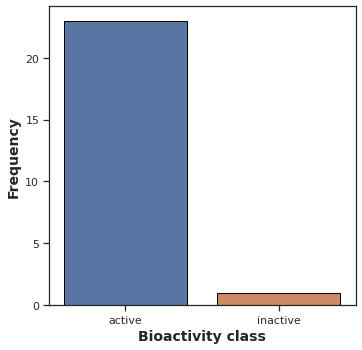

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

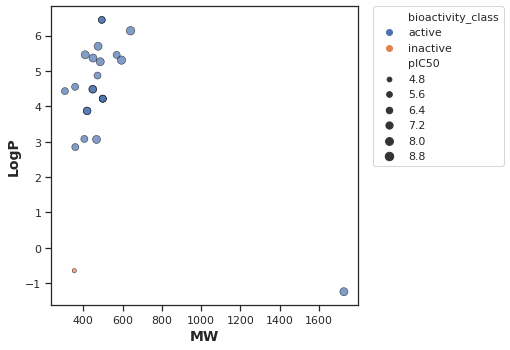

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('pdl1_plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

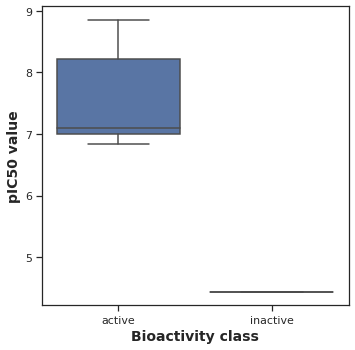

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.052338,0.05,Same distribution (fail to reject H0)


#### **MW**

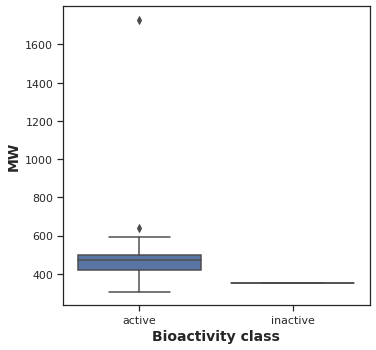

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1.0,0.073972,0.05,Same distribution (fail to reject H0)


#### **LogP**

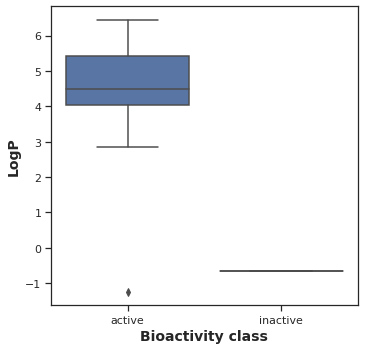

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1.0,0.073972,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

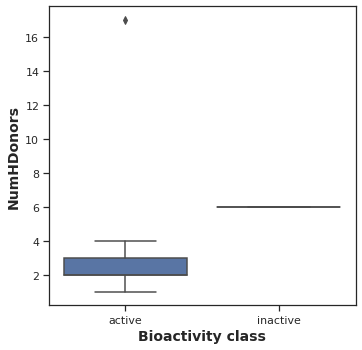

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1.0,0.062523,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

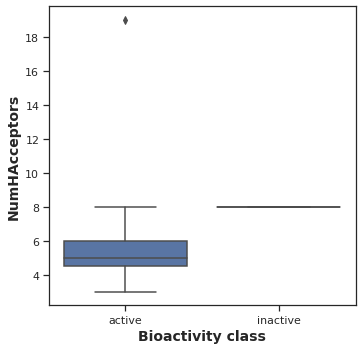

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('pdl1_plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2.0,0.092556,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactive** did not display ***statistically significant difference*** even though the single inactive compound was well below the threshold given for inactive compounds (< 5). Perhaps it is not statistically significant since there was only a single inactive compound. 
###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), none exhibited ***no difference*** between the **actives** and **inactives**, meaning all descriptors were statistically insignificant.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: pdl1_plot_NumHAcceptors.pdf (deflated 37%)
  adding: pdl1_plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: pdl1_plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: pdl1_plot_LogP.pdf (deflated 37%)
  adding: pdl1_plot_bioactivity_class.pdf (deflated 39%)
  adding: pdl1_plot_NumHDonors.pdf (deflated 37%)
  adding: pdl1_plot_MW_vs_LogP.pdf (deflated 27%)
  adding: pdl1_bioactivity_preprocessed_data.csv (deflated 72%)
